<a href="https://colab.research.google.com/github/Numanur/data-science-ml/blob/main/Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [5]:
#creating x(feature matrix)
x = df.drop("target", axis=1)
#creating y (labels)
y = df["target"]


In [6]:
#choosing a model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [7]:
#split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [8]:
#training the model
clf.fit(x_train, y_train);

In [9]:
#predicting
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1])

In [10]:
y_test

216    0
296    0
38     1
9      1
217    0
      ..
94     1
82     1
231    0
203    0
272    0
Name: target, Length: 91, dtype: int64

In [11]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")


Accuracy: 0.835


In [12]:
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8351648351648352

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79        35
           1       0.87      0.86      0.86        56

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91



In [15]:
confusion_matrix(y_test, y_pred)

array([[28,  7],
       [ 8, 48]])

In [16]:
accuracy_score(y_test, y_pred)

0.8351648351648352

# **Fine Tuning the model**

In [17]:
#we need to tune the n_estimators
np.random.seed(0)
for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
  print(f"Model accuracy on test set: {clf.score(x_test, y_test)*100:.3f}%")
  print("")

Trying model with 10 estimators...
Model accuracy on test set: 75.824%

Trying model with 20 estimators...
Model accuracy on test set: 84.615%

Trying model with 30 estimators...
Model accuracy on test set: 82.418%

Trying model with 40 estimators...
Model accuracy on test set: 83.516%

Trying model with 50 estimators...
Model accuracy on test set: 84.615%

Trying model with 60 estimators...
Model accuracy on test set: 82.418%

Trying model with 70 estimators...
Model accuracy on test set: 84.615%

Trying model with 80 estimators...
Model accuracy on test set: 85.714%

Trying model with 90 estimators...
Model accuracy on test set: 84.615%



In [18]:
import pickle
pickle.dump(clf, open("random_forest_v1.pkl", "wb"))

In [19]:
loaded_model = pickle.load(open("random_forest_v1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.8461538461538461

# **Finding best Settings**

In [20]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']   # <-- No 'auto' anymore
}


rf_random = RandomizedSearchCV(
    estimator = clf,
    param_distributions = param_grid,
    n_iter = 50,  # How many different combinations to try
    cv = 5,       # 5-fold cross-validation
    verbose = 2,  # How much information to print
    random_state = 42,
    n_jobs = -1   # Use all processors
)

In [21]:
rf_random.fit(x_train, y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=90),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=2)

In [22]:
print(rf_random.best_params_)


{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None}


In [23]:
best_clf = RandomForestClassifier(
    n_estimators=500,
    min_samples_split=2,
    min_samples_leaf=4,
    max_features='log2',
    max_depth=5,
    random_state=42
)

In [24]:
best_clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       n_estimators=500, random_state=42)

In [25]:
y_pred = best_clf.predict(x_test)

In [26]:
best_clf.score(x_train, y_train)

0.9150943396226415

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8681318681318682

Confusion Matrix:
 [[28  7]
 [ 5 51]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.88      0.91      0.89        56

    accuracy                           0.87        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91



#**Use of predict_proba() function**

In [28]:
best_clf.predict_proba(x_test)

array([[0.60646998, 0.39353002],
       [0.47881987, 0.52118013],
       [0.19309324, 0.80690676],
       [0.16065079, 0.83934921],
       [0.87652451, 0.12347549],
       [0.40396255, 0.59603745],
       [0.13666238, 0.86333762],
       [0.54762351, 0.45237649],
       [0.42684342, 0.57315658],
       [0.05524865, 0.94475135],
       [0.43388201, 0.56611799],
       [0.70408312, 0.29591688],
       [0.14559252, 0.85440748],
       [0.91874003, 0.08125997],
       [0.40180284, 0.59819716],
       [0.3711108 , 0.6288892 ],
       [0.87985416, 0.12014584],
       [0.29967799, 0.70032201],
       [0.81659554, 0.18340446],
       [0.3793809 , 0.6206191 ],
       [0.24141304, 0.75858696],
       [0.97283391, 0.02716609],
       [0.38568817, 0.61431183],
       [0.41162908, 0.58837092],
       [0.50667286, 0.49332714],
       [0.57384192, 0.42615808],
       [0.2004479 , 0.7995521 ],
       [0.91883837, 0.08116163],
       [0.09397181, 0.90602819],
       [0.27262502, 0.72737498],
       [0.

In [29]:
best_clf.predict_proba(x_test[:5])

array([[0.60646998, 0.39353002],
       [0.47881987, 0.52118013],
       [0.19309324, 0.80690676],
       [0.16065079, 0.83934921],
       [0.87652451, 0.12347549]])

This represents the probability of each class either heart disease or not heart disease

#**Evaluation of a model**
- `score` method
- `scoring` Parameter
- problem specific metrics functions

In [30]:
df = pd.read_csv("/content/drive/MyDrive/Colab Datasets/heart-disease.csv")
X = df.drop("target", axis=1)
y = df["target"]

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(15)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

#Using the score method

In [32]:
model.score(X_train, y_train)

1.0

In [33]:
model.score(X_test, y_test)

0.7912087912087912

#Using `cross-validation` scoring method

In [34]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.78688525, 0.8       , 0.78333333])

In [35]:
single_score = model.score(X_test, y_test)
cross_mean_score = np.mean(cross_val_score(model, X, y))
single_score, cross_mean_score

(0.7912087912087912, np.float64(0.8117486338797815))

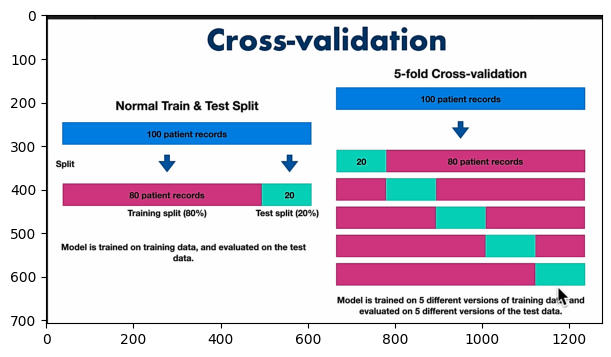

In [36]:
img = plt.imread("/content/drive/MyDrive/Colab Datasets/images/cv.png")
plt.figure(figsize=(15,4))
plt.imshow(img)

#cross validation takes the whole X and Y as input and divide the dataset to 5(cv=5) different splits and fit them.

#**Evaluation Report Data**
* cross_val_score accuracy
* AUC/ROC curve
* Confusion matrix
* Classification report

**Cross Val Accuracy**

In [37]:
np.random.seed(15)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

model = RandomForestClassifier()

X = df.drop("target", axis=1)
y = df["target"]

cross_val=cross_val_score(model, X, y)

print(f"Cross Val Accuracy: {np.mean(cross_val)*100:.2f}%")


Cross Val Accuracy: 82.15%


**Area under the reciever operating characteristic curve(ROC/AUC)**

ROC is the ratio curve of model's true positive rate vs false positive rate.
- True Positive: Model predicts 1, when truth is 1.
- False Positive: Model predicts 1, when truth is 0.
- True Negative: Model predicts 0 when truth ia 0.
- False Negative: Model predicts 0 when truth is 1.

In [38]:
from sklearn.metrics import roc_curve
np.random.seed(15)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_preds = model.predict_proba(X_test)
y_preds[:5]

array([[0.98, 0.02],
       [0.62, 0.38],
       [0.16, 0.84],
       [0.05, 0.95],
       [0.39, 0.61]])

In [39]:
y_prob_positive = y_preds[:, 1]
y_prob_positive[:10]

array([0.02, 0.38, 0.84, 0.95, 0.61, 0.29, 0.09, 0.38, 0.44, 0.78])

In [40]:
#Calculate tpr, fpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.05263158, 0.05263158, 0.10526316,
       0.13157895, 0.13157895, 0.15789474, 0.15789474, 0.15789474,
       0.18421053, 0.18421053, 0.21052632, 0.26315789, 0.26315789,
       0.31578947, 0.34210526, 0.39473684, 0.39473684, 0.42105263,
       0.44736842, 0.55263158, 0.60526316, 0.71052632, 0.73684211,
       0.94736842, 1.        ])

Plotting the ROC curve

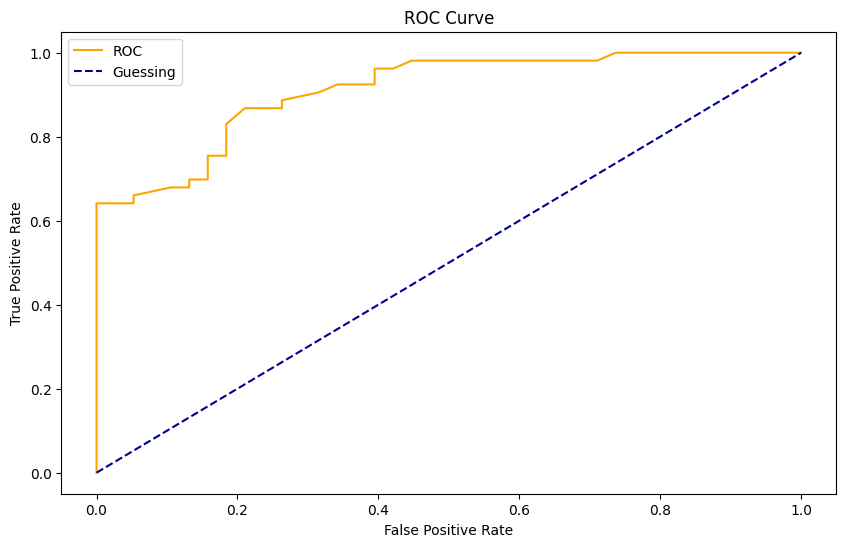

In [41]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color="orange", label="ROC")
plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

#**Confusion Matrix**

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[31,  7],
       [12, 41]])

In [43]:
pd.crosstab(y_test, y_pred, rownames=["Actual Labels"], colnames=["Predicted Labels"])

Predicted Labels   0   1
Actual Labels           
0                 31   7
1                 12  41

**Visualize using Seaborn Heatmap**

Text(50.722222222222214, 0.5, 'Actual Labels')

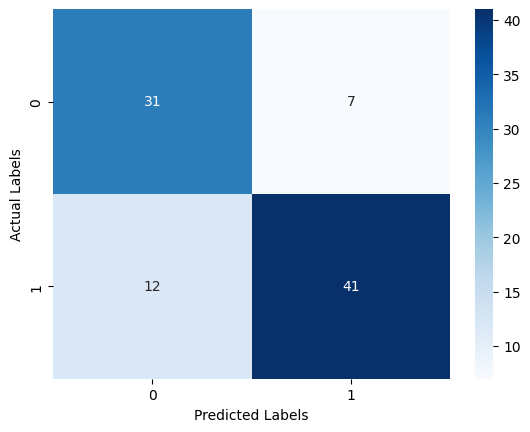

In [44]:
import seaborn as sns

cfmat = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cfmat, annot=True, cmap="Blues")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("Actual Labels")

#**Evaluation of Regression Model**

- R^2
- Mean Absolute Error(MAE)
- Mean Squared Error(MSE)

In [52]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [56]:
np.random.seed(15)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [60]:
model.score(X_train, y_train)

0.9727355624511098

In [62]:
model.score(X_test, y_test)

0.8008097561884113

In [65]:
y_preds = model.predict(X_test)